# *Software Sales Timeseries Forecasting*

![softwarebanner](softwaresales.png)

## 🔎 Exploratory Data Analysis

### Data Review

In [1]:
import pandas as pd

In [2]:
sales = sales = pd.read_csv('data_input/sales_train.csv')
sales.head()

date  date_block_num  shop_id                           shop_name  \
0  02.01.2013               0       59  Yaroslavl shopping center "Altair"   
1  10.01.2013               0       59  Yaroslavl shopping center "Altair"   
2  04.01.2013               0       59  Yaroslavl shopping center "Altair"   
3  19.01.2013               0       59  Yaroslavl shopping center "Altair"   
4  31.01.2013               0       59  Yaroslavl shopping center "Altair"   

   item_id  item_price  item_cnt_day  
0    22154       999.0           1.0  
1    22151       399.0           1.0  
2     5603       699.0           1.0  
3     5587       199.0           2.0  
4     5613      5571.0           1.0

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   shop_name       object 
 4   item_id         int64  
 5   item_price      float64
 6   item_cnt_day    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 179.2+ MB


In [4]:
sales.dtypes

date               object
date_block_num      int64
shop_id             int64
shop_name          object
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

<div class="alert">

Berikut adalah deskripsi data:
- Data ini terdiri dari 2.935.849 observasi (baris).
- Berikut adalah glosarium yang disediakan di platform Kaggle:
  - `date` adalah format tanggal yang diberikan dalam format **dd.mm.yyyy**.
  - `date_block_num` adalah nomor bulan berturut-turut yang digunakan untuk kemudahan (Januari 2013 adalah 0, Februari 2013 adalah 1, dan seterusnya).
  - `shop_id` adalah pengenal unik dari toko.
  - `shop_name` adalah nama toko.
  - `item_id` adalah pengenal unik dari produk.
  - `item_price` adalah harga produk pada tanggal tertentu.
  - `item_cnt_day` adalah jumlah produk yang terjual pada tanggal tertentu.

</div> 

### Data Preparation

1️⃣ Konversi tipe data

In [5]:
sales['date'] = pd.to_datetime(sales['date'], dayfirst=True)

In [6]:
sales['shop_name'] = sales['shop_name'].astype('category')

In [7]:
sales.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
shop_name               category
item_id                    int64
item_price               float64
item_cnt_day             float64
dtype: object

2️⃣ Urutkan data secara *ascending* berdasarkan `date`

In [8]:
sales.sort_values(by='date', inplace= True)

3️⃣ Membuat kolom baru dengan nama `total_revenue` sebagai target prediksi

In [9]:
sales['total_revenue'] = sales['item_price'] * sales['item_cnt_day']

4️⃣ Menampilkan top 3 shop pada DataFrame

In [10]:
sales['shop_id'].value_counts().head(3)

shop_id
31    235636
25    186104
54    143480
Name: count, dtype: int64

In [11]:
top_3_shop = sales['shop_id'].value_counts().head(3)
top_3_shop

shop_id
31    235636
25    186104
54    143480
Name: count, dtype: int64

In [12]:
sales[ (sales['shop_id'] == 31) | (sales['shop_id'] == 25) | (sales['shop_id'] == 54)  ]

date  date_block_num  shop_id  \
1811351 2013-01-01               0       54   
1811348 2013-01-01               0       54   
1811331 2013-01-01               0       54   
1811257 2013-01-01               0       54   
1811238 2013-01-01               0       54   
...            ...             ...      ...   
1617940 2015-10-31              33       31   
1617963 2015-10-31              33       31   
1617968 2015-10-31              33       31   
1617969 2015-10-31              33       31   
1618017 2015-10-31              33       31   

                                   shop_name  item_id  item_price  \
1811351        Khimki Shopping Center "Mega"     4327       449.0   
1811348        Khimki Shopping Center "Mega"     4323       399.0   
1811331        Khimki Shopping Center "Mega"     4372      1999.0   
1811257        Khimki Shopping Center "Mega"     4249      1899.0   
1811238        Khimki Shopping Center "Mega"     3327      1499.0   
...                                      ...      ...         ...   
1617940  Moscow shopping center "Semenovsky"    16009      1499.0   
1617963  Moscow shopping center "Semenovsky"    15898       699.0   
1617968  Moscow shopping center "Semenovsky"    15511      1199.0   
1617969  Moscow shopping center "Semenovsky"    15481      1139.0   
1618017  Moscow shopping center "Semenovsky"    15397      1569.0   

         item_cnt_day  total_revenue  
1811351           1.0          449.0  
1811348           1.0          399.0  
1811331           1.0         1999.0  
1811257           2.0         3798.0  
1811238           1.0         1499.0  
...               ...            ...  
1617940           1.0         1499.0  
1617963           1.0          699.0  
1617968           1.0         1199.0  
1617969           1.0         1139.0  
1618017           1.0         1569.0  

[565220 rows x 8 columns]

In [13]:
top_3_shop.index

Index([31, 25, 54], dtype='int64', name='shop_id')

In [14]:
sales[sales['shop_id'].isin(top_3_shop.index)]

date  date_block_num  shop_id  \
1811351 2013-01-01               0       54   
1811348 2013-01-01               0       54   
1811331 2013-01-01               0       54   
1811257 2013-01-01               0       54   
1811238 2013-01-01               0       54   
...            ...             ...      ...   
1617940 2015-10-31              33       31   
1617963 2015-10-31              33       31   
1617968 2015-10-31              33       31   
1617969 2015-10-31              33       31   
1618017 2015-10-31              33       31   

                                   shop_name  item_id  item_price  \
1811351        Khimki Shopping Center "Mega"     4327       449.0   
1811348        Khimki Shopping Center "Mega"     4323       399.0   
1811331        Khimki Shopping Center "Mega"     4372      1999.0   
1811257        Khimki Shopping Center "Mega"     4249      1899.0   
1811238        Khimki Shopping Center "Mega"     3327      1499.0   
...                                      ...      ...         ...   
1617940  Moscow shopping center "Semenovsky"    16009      1499.0   
1617963  Moscow shopping center "Semenovsky"    15898       699.0   
1617968  Moscow shopping center "Semenovsky"    15511      1199.0   
1617969  Moscow shopping center "Semenovsky"    15481      1139.0   
1618017  Moscow shopping center "Semenovsky"    15397      1569.0   

         item_cnt_day  total_revenue  
1811351           1.0          449.0  
1811348           1.0          399.0  
1811331           1.0         1999.0  
1811257           2.0         3798.0  
1811238           1.0         1499.0  
...               ...            ...  
1617940           1.0         1499.0  
1617963           1.0          699.0  
1617968           1.0         1199.0  
1617969           1.0         1139.0  
1618017           1.0         1569.0  

[565220 rows x 8 columns]

In [15]:
sales_top_3_shop = sales[sales['shop_id'].isin(top_3_shop.index)]

In [16]:
sales_top_3_shop.head()

date  date_block_num  shop_id                      shop_name  \
1811351 2013-01-01               0       54  Khimki Shopping Center "Mega"   
1811348 2013-01-01               0       54  Khimki Shopping Center "Mega"   
1811331 2013-01-01               0       54  Khimki Shopping Center "Mega"   
1811257 2013-01-01               0       54  Khimki Shopping Center "Mega"   
1811238 2013-01-01               0       54  Khimki Shopping Center "Mega"   

         item_id  item_price  item_cnt_day  total_revenue  
1811351     4327       449.0           1.0          449.0  
1811348     4323       399.0           1.0          399.0  
1811331     4372      1999.0           1.0         1999.0  
1811257     4249      1899.0           2.0         3798.0  
1811238     3327      1499.0           1.0         1499.0

In [17]:
sales_top_3_shop.groupby(['date', 'shop_id']) \
[['item_cnt_day', 'total_revenue']].sum().reset_index() \
.rename(columns={'item_cnt_day': 'total_qty'})

date  shop_id  total_qty  total_revenue
0    2013-01-01       54      415.0      316557.00
1    2013-01-02       25      568.0      345174.13
2    2013-01-02       31      568.0      396376.10
3    2013-01-02       54      709.0      519336.00
4    2013-01-03       25      375.0      249421.00
...         ...      ...        ...            ...
2882 2015-10-29       31      152.0      103456.00
2883 2015-10-30       25      275.0      297992.00
2884 2015-10-30       31      267.0      204317.00
2885 2015-10-31       25      287.0      263524.00
2886 2015-10-31       31      249.0      237587.00

[2887 rows x 4 columns]

In [18]:
daily_sales = sales_top_3_shop.groupby(['date', 'shop_id']) \
[['item_cnt_day', 'total_revenue']].sum().reset_index() \
.rename(columns={'item_cnt_day': 'total_qty'})

### Multiple Time Series

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

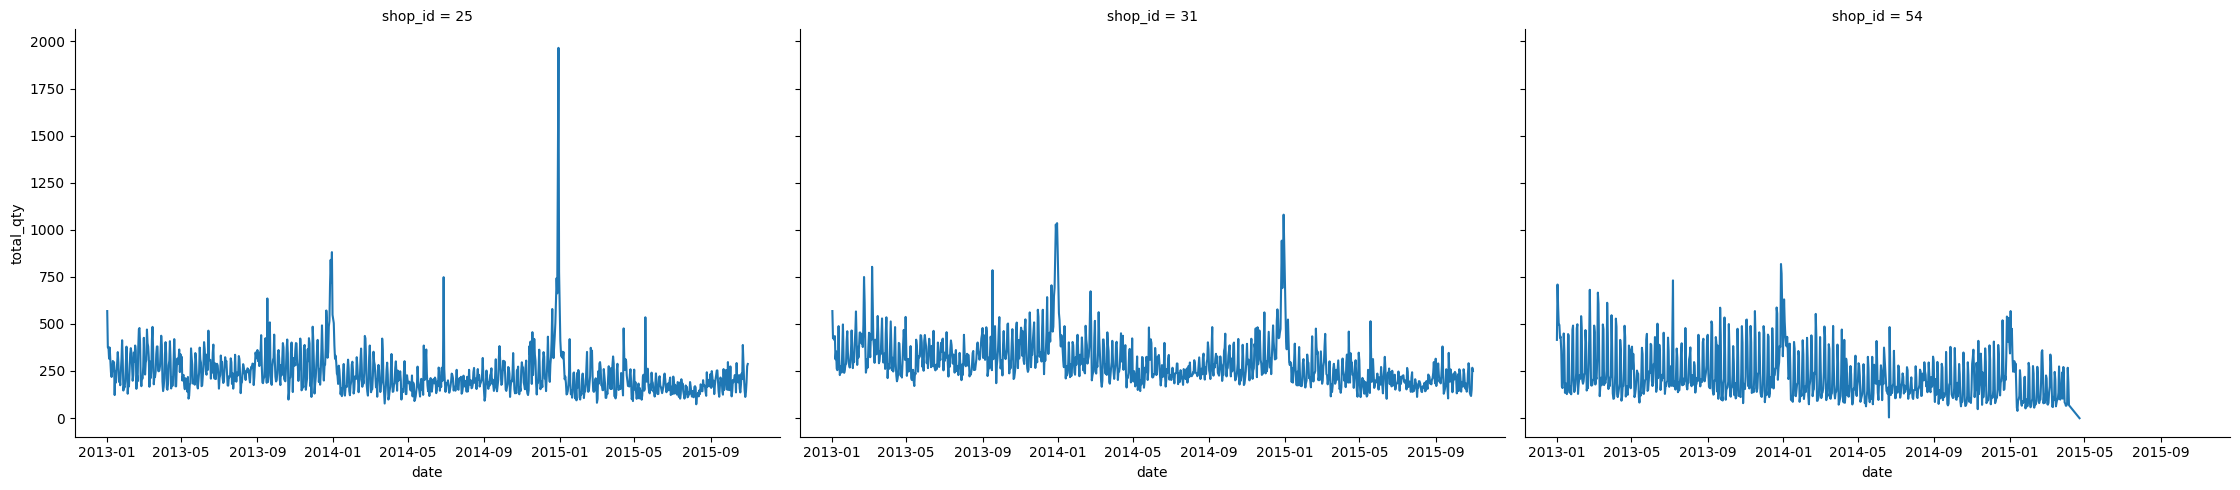

In [20]:
sns.relplot(data= daily_sales, kind= 'line',
            x= 'date', y= 'total_qty', col= 'shop_id', aspect= 1.5)
plt.show()

<div class= alert>

`Interpretasi`

-   Fluktuasi pesanan
    -   Ketiga toko menunjukkan fluktuasi dalam jumlah pesanan harian. Ada hari-hari dengan pesanan yang tinggi dan hari-hari dengan pesanan yang rendah.

-   Pola musiman
    -   Terlihat adanya pola musiman di ketiga toko, dengan peningkatan pesanan di sekitar akhir tahun (November-Desember), yang mungkin terkait dengan liburan atau akhir tahun.

</div>

### Multivariate Time Series

In [21]:
daily_sales_25 = daily_sales[daily_sales['shop_id'] == 25]

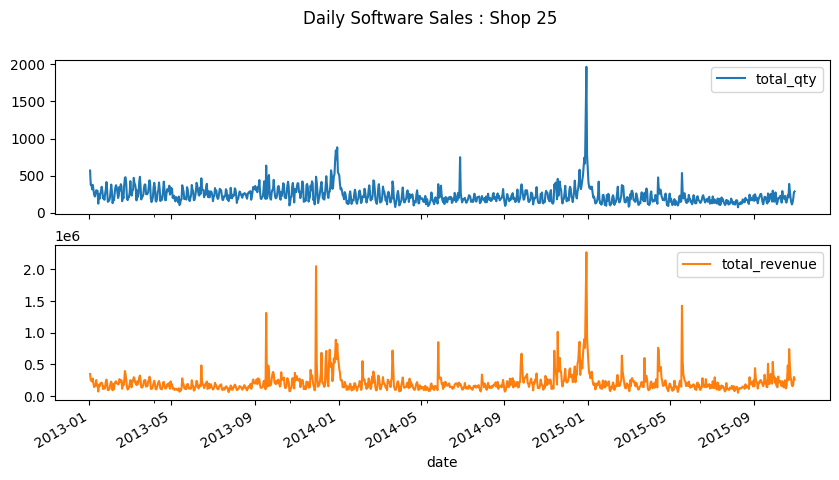

In [22]:
daily_sales_25.set_index('date')[['total_qty', 'total_revenue']].plot(subplots=True, figsize= (10, 5))
plt.suptitle('Daily Software Sales : Shop 25')
plt.show()

<div class= alert>

`Interpretasi`

-   Fluktuasi Penjualan
    -   Secara umum, baik `jumlah unit yang terjual maupun total pendapatan menunjukkan fluktuasi yang signifikan dari hari ke hari`. Terdapat hari-hari dengan penjualan yang sangat tinggi dan hari-hari dengan penjualan yang rendah.

-   Pola Musiman
    -   Sepertinya ada pola musiman dalam penjualan. `Terlihat adanya lonjakan penjualan di sekitar akhir tahun (sekitar bulan November dan Desember) pada tahun 2013, 2014, dan 2015`. Ini mungkin menunjukkan peningkatan permintaan perangkat lunak selama periode liburan atau akhir tahun.

-   Tren
    -   `Secara keseluruhan, tidak terlihat adanya tren kenaikan atau penurunan yang jelas dalam penjualan selama periode yang ditampilkan`. Penjualan cenderung berfluktuasi di sekitar nilai rata-rata tertentu.

-   Hubungan antara Jumlah dan Pendapatan
    -   Pada umumnya, ketika jumlah unit yang terjual tinggi, total pendapatan juga tinggi. Namun, ada beberapa pengecualian di mana penjualan tinggi tetapi pendapatan tidak terlalu tinggi. Ini mungkin menunjukkan `adanya variasi harga jual atau diskon pada waktu-waktu tertentu`.

</div>

## 🔨 Model Building : Time Series Forecasting with Prophet

### Model Preparation

1️⃣ Konversi variabel `daily_sales_25` menggunakan method `rename()`

In [23]:
daily_sales_25[['date', 'total_qty']].rename(
    columns={
        'date' : 'ds',
        'total_qty' : 'y'
    }
)

ds      y
1    2013-01-02  568.0
4    2013-01-03  375.0
7    2013-01-04  377.0
10   2013-01-05  315.0
13   2013-01-06  374.0
...         ...    ...
2877 2015-10-27  112.0
2879 2015-10-28  136.0
2881 2015-10-29  190.0
2883 2015-10-30  275.0
2885 2015-10-31  287.0

[1030 rows x 2 columns]

In [24]:
daily_total_qty = daily_sales_25[['date', 'total_qty']].rename(
    columns={
        'date': 'ds',
        'total_qty' : 'y'
    }
)

daily_total_qty.head()

ds      y
1  2013-01-02  568.0
4  2013-01-03  375.0
7  2013-01-04  377.0
10 2013-01-05  315.0
13 2013-01-06  374.0

In [25]:
daily_total_qty.head()

ds      y
1  2013-01-02  568.0
4  2013-01-03  375.0
7  2013-01-04  377.0
10 2013-01-05  315.0
13 2013-01-06  374.0

### Fitting Model

1️⃣ Import library

In [26]:
from prophet import Prophet
import cmdstanpy

import warnings
warnings.simplefilter('ignore', category= FutureWarning)

2️⃣ Inisiasi model dengan menggunakan fungsi `Prophet()`

In [27]:
model_25 = Prophet()

3️⃣ Fitting data `daily_total_qty` menggunakan method `fit()`

In [28]:
model_25.fit(daily_total_qty)

17:52:30 - cmdstanpy - INFO - Chain [1] start processing
17:52:30 - cmdstanpy - INFO - Chain [1] done processing


### Forecasting

#### Future Dataframe

1️⃣ Membuat dataframe masa depan dengan menggunakan method `make_future_dataframe()`

In [29]:
daily_total_qty.tail()

ds      y
2877 2015-10-27  112.0
2879 2015-10-28  136.0
2881 2015-10-29  190.0
2883 2015-10-30  275.0
2885 2015-10-31  287.0

In [30]:
model_25.make_future_dataframe(freq= 'D', periods= 365)

ds
0    2013-01-02
1    2013-01-03
2    2013-01-04
3    2013-01-05
4    2013-01-06
...         ...
1390 2016-10-26
1391 2016-10-27
1392 2016-10-28
1393 2016-10-29
1394 2016-10-30

[1395 rows x 1 columns]

In [31]:
future_25 = model_25.make_future_dataframe(freq= 'D', periods= 365)

#### Prediction

1️⃣ Memprediksi data

In [32]:
forecast_25 = model_25.predict(future_25)

In [33]:
forecast_25.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2013-01-02  296.018654  369.384510  585.588878   296.018654   296.018654   
1 2013-01-03  295.950553  376.258167  584.699692   295.950553   295.950553   
2 2013-01-04  295.882453  416.697534  625.710210   295.882453   295.882453   
3 2013-01-05  295.814352  423.362790  634.233283   295.814352   295.814352   
4 2013-01-06  295.746252  344.767769  548.034741   295.746252   295.746252   

   additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
0      184.196466            184.196466            184.196466 -34.946939   
1      188.112878            188.112878            188.112878 -12.984270   
2      228.659704            228.659704            228.659704  47.239963   
3      236.394011            236.394011            236.394011  75.957853   
4      155.516200            155.516200            155.516200  17.025398   

   weekly_lower  weekly_upper      yearly  yearly_lower  yearly_upper  \
0    -34.946939    -34.946939  219.143405    219.143405    219.143405   
1    -12.984270    -12.984270  201.097148    201.097148    201.097148   
2     47.239963     47.239963  181.419741    181.419741    181.419741   
3     75.957853     75.957853  160.436157    160.436157    160.436157   
4     17.025398     17.025398  138.490802    138.490802    138.490802   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0  480.215120  
1                         0.0  484.063432  
2                         0.0  524.542157  
3                         0.0  532.208363  
4                         0.0  451.262452

#### Visualization

In [34]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [35]:
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objects as go
plot_plotly(model_25, forecast_25)

In [36]:
plot_components_plotly(model_25, forecast_25)

### Time Series Components

#### Trend Components

1️⃣ Membuat ilustrasi slope pada trend menggunakan model linear `old()` dari library `statsmodel`

In [37]:
# import the library
import statsmodels.api as sm

# define predictor and target variable
daily_sales_25_copy = daily_sales_25.copy()
daily_sales_25_copy['date_ordinal'] = daily_sales_25_copy['date'].apply(lambda date: date.toordinal())

X = daily_sales_25_copy['date_ordinal']
y = daily_sales_25_copy['total_qty']

# build ols model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y, X_train_sm).fit()

# printing the parameters
lr.params

const           77826.022549
date_ordinal       -0.105511
dtype: float64

-   const (konstanta)
    -   Nilai 124413.733302 merupakan intercept dari model. Ini adalah nilai prediksi total_qty ketika date_ordinal bernilai 0. Namun, interpretasi ini mungkin tidak relevan dalam konteks data karena date_ordinal tidak akan pernah bernilai 0.

-   date_ordinal
    -   Nilai -0.168772 merupakan koefisien regresi untuk variabel date_ordinal. Ini menunjukkan bahwa setiap kenaikan satu satuan dalam date_ordinal (yaitu, setiap hari), total_qty diprediksi akan menurun sebesar 0.168772 unit.

#### Automatic Changepoint Detection

<div class= alert success>

*Automatic Changepoint Detection* adalah metode yang secara otomatis mendeteksi perubahan signifikan dalam tren data waktu. Dalam konteks model Prophet (dan beberapa model lainnya), changepoint detection digunakan untuk mengidentifikasi titik-titik waktu di mana pola atau tren data mengalami perubahan, seperti lonjakan, penurunan, atau pergeseran dalam arah pertumbuhan.

Tujuan `Automatic Changepoint Detection`
1.  Menangkap Perubahan Tren Secara Akurat
    -   Tren data dalam waktu mungkin tidak selalu linier atau konsisten; ada kalanya terjadi perubahan besar, seperti akibat musim, kebijakan baru, atau peristiwa mendadak. Deteksi changepoint membantu model memahami perubahan ini.

2.  Mengurangi Overfitting atau Underfitting
    -   Dengan mendeteksi dan memasukkan hanya titik-titik perubahan yang signifikan, model dapat menghindari terlalu sensitif terhadap data atau menjadi terlalu kaku.

3.  Memperbaiki Prediksi Jangka Panjang
    -   Dengan mengetahui kapan tren berubah, model dapat memberikan prediksi yang lebih realistis dan akurat, terutama untuk data yang menunjukkan tren tidak linier.

4.  Meningkatkan Interpretasi:
    -   Changepoint detection memungkinkan interpretasi yang lebih baik mengenai kapan dan bagaimana pola data berubah, membantu analisis mendalam terhadap penyebabnya.

</div>

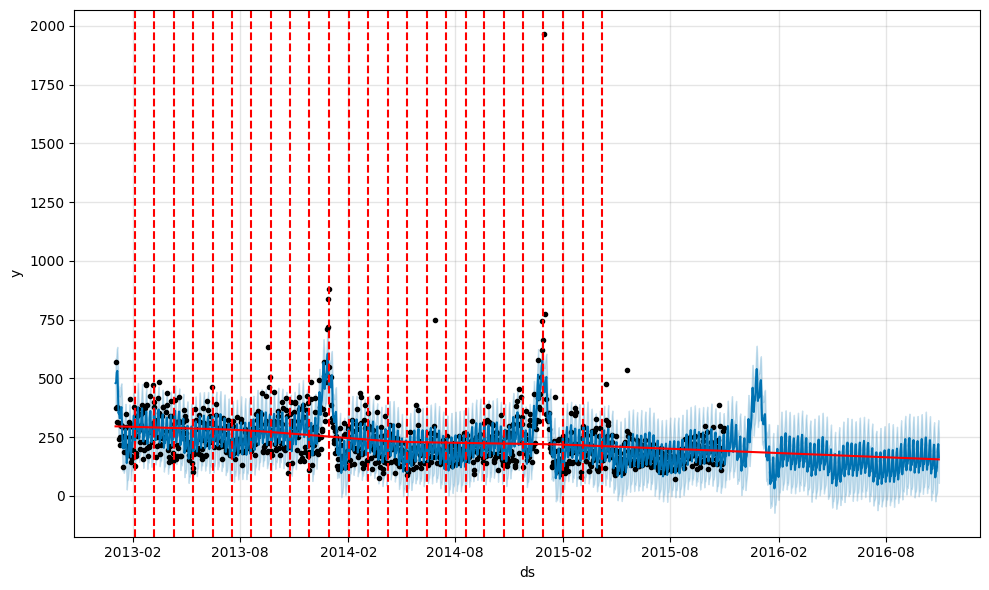

In [38]:
from prophet.plot import add_changepoints_to_plot

fig = model_25.plot(forecast_25)
a = add_changepoints_to_plot(fig.gca(), model_25, forecast_25, threshold=0)

#### Adjusting Trend Flexibility

<div class= alert>

`Adjusting Trend Flexibility` adalah proses menyesuaikan sejauh mana model mampu menangkap perubahan atau variasi dalam tren data waktu (time series). Ini adalah langkah penting dalam membangun model yang dapat menangani perubahan pola data tanpa menjadi terlalu sensitif (overfitting) atau terlalu kaku (underfitting).

Tujuan `Adjusting Trend Flexibility`
1.  Menghindari Overfitting
    -   Jika model terlalu fleksibel, ia akan mencoba menyesuaikan setiap fluktuasi kecil dalam data, termasuk noise (gangguan acak), sehingga hasil prediksi tidak generalis.

2.  Menghindari Underfitting
    -   Jika model terlalu kaku, ia mungkin gagal menangkap perubahan tren yang signifikan, menghasilkan prediksi yang kurang akurat.

3.  Mengoptimalkan Kinerja Model
    -   Dengan fleksibilitas yang tepat, model dapat menangkap perubahan penting dalam tren tanpa kehilangan kemampuan untuk generalisasi.

</div>

1️⃣ Fitting Model

In [39]:
model_tuning_trend = Prophet(
    changepoint_prior_scale= 0.5
)

model_tuning_trend.fit(daily_total_qty)

17:52:34 - cmdstanpy - INFO - Chain [1] start processing
17:52:34 - cmdstanpy - INFO - Chain [1] done processing


2️⃣ Forecasting

In [40]:
future = model_tuning_trend.make_future_dataframe(freq= 'D', periods= 365)
forecast_tuning = model_tuning_trend.predict(future)

3️⃣ Visualization

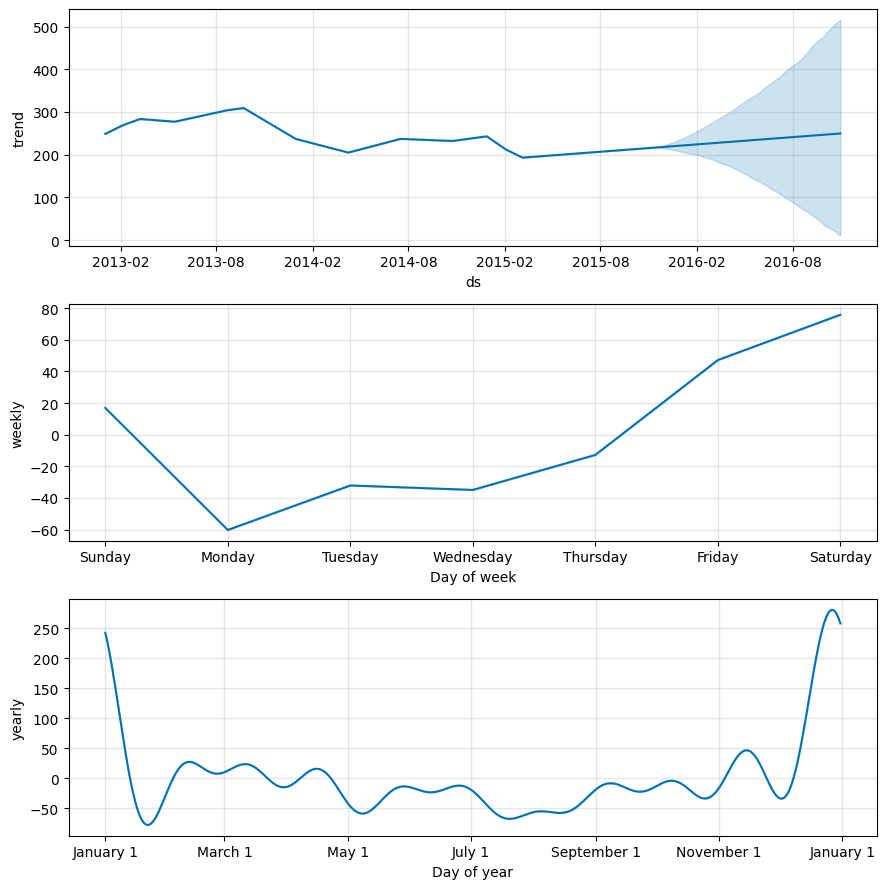

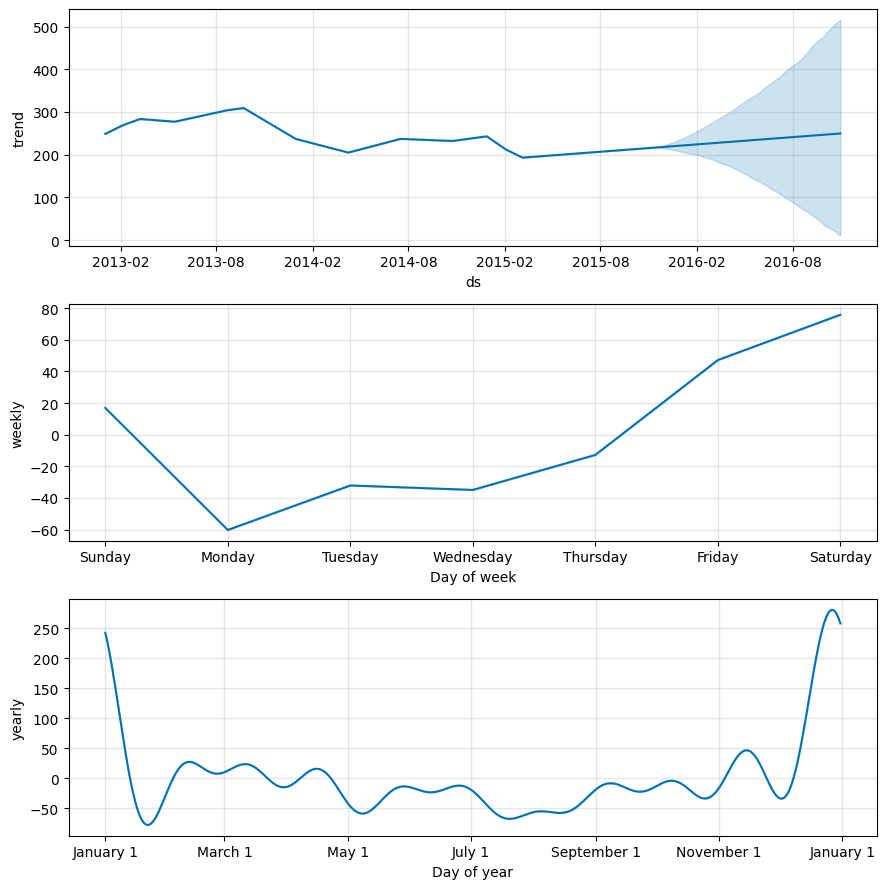

In [41]:
model_tuning_trend.plot_components(forecast_tuning)

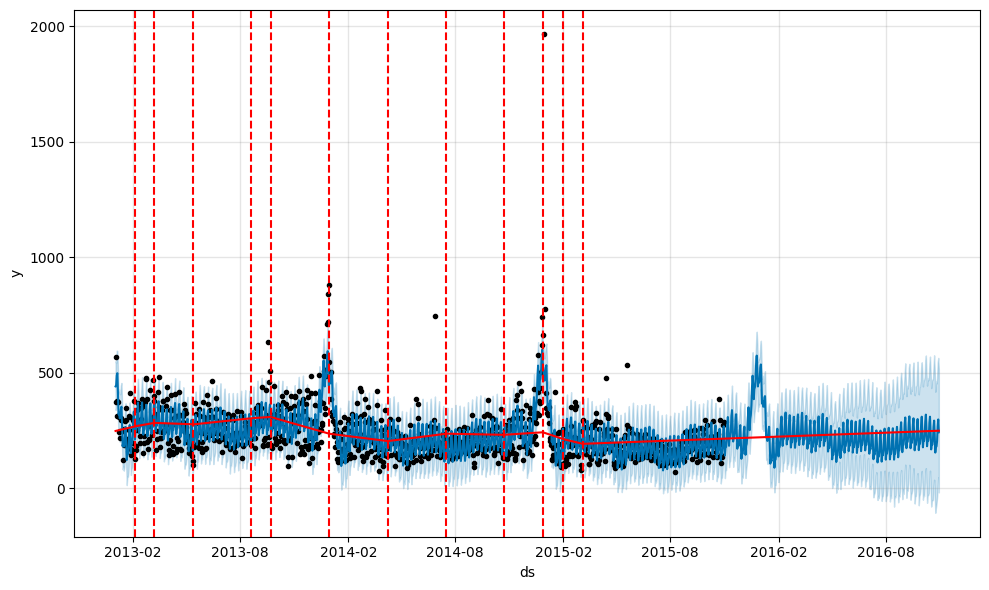

In [42]:
fig = model_tuning_trend.plot(forecast_tuning)
a = add_changepoints_to_plot(fig.gca(), model_tuning_trend, forecast_tuning)

### Seasonality Components

<div class= alert>

`Seasonality components` pada Prophet adalah fitur untuk menangkap pola berulang dalam data waktu, baik yang sudah ada secara default (tahunan, mingguan, harian) maupun yang ditentukan pengguna (custom). Dengan memanfaatkan komponen ini, model dapat menghasilkan prediksi yang lebih akurat dan relevan.

</div>

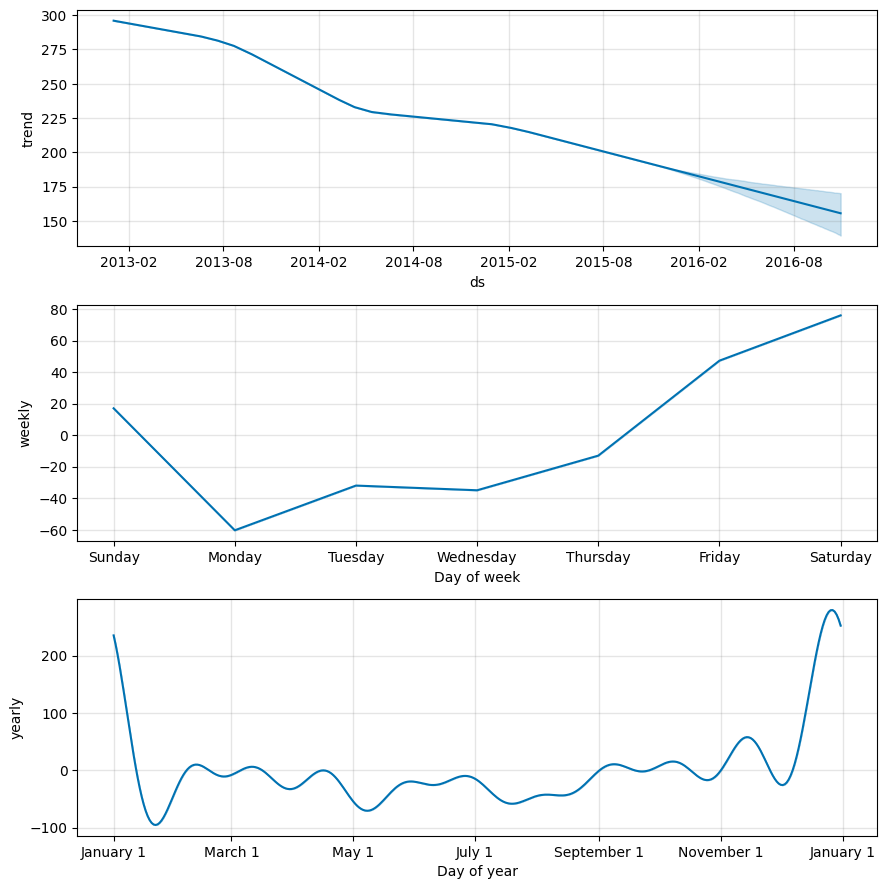

In [43]:
fig = model_25.plot_components(forecast_25)

<div class= 'alert'>

`Interpretasi`
1. Musiman Mingguan: 
    -   Hari dengan Penjualan Paling Sedikit
Dari grafik musiman mingguan (panel tengah), terlihat bahwa Senin adalah hari dengan penjualan paling sedikit karena nilai penjualan berada pada titik terendah.

2. Musiman Tahunan
    -   Bulan dengan Penjualan Paling Sedikit dari grafik musiman tahunan (panel bawah), terlihat bahwa penjualan paling sedikit terjadi sekitar Mei, di mana nilai penjualan berada di titik terendah sepanjang tahun.

`Strategi Bisnis`

1. Strategi untuk Hari Senin (Penjualan Mingguan)
    -   Promosi Khusus: Buat promosi seperti diskon khusus atau penawaran bundel pada hari Senin untuk meningkatkan aktivitas belanja.
    -   Penargetan Pelanggan: Kirim email atau iklan digital kepada pelanggan menjelang akhir pekan untuk mendorong belanja pada hari Senin.
    -   Pengalaman Berbeda: Buat acara menarik, seperti hari tema atau aktivitas tambahan, untuk menarik pengunjung di toko atau platform online.

2. Strategi untuk Bulan Mei (Penjualan Tahunan):
    -   Kampanye Pemasaran: Luncurkan kampanye pemasaran kreatif menjelang Mei, seperti obral pertengahan tahun atau peluncuran produk baru.
    -   Diversifikasi Produk: Analisis kebutuhan pelanggan pada bulan Mei dan tambahkan produk yang lebih relevan untuk periode tersebut.
    -   Kolaborasi atau Acara Khusus: Buat kolaborasi dengan mitra atau adakan acara besar (seperti festival belanja) untuk menarik perhatian konsumen.

3. Optimalkan Logistik dan Inventori
    -   Kurangi stok barang pada bulan dan hari dengan penjualan rendah untuk menghemat biaya penyimpanan.
    -   Alihkan fokus ke produk dengan permintaan tinggi selama musim yang lebih aktif.

4. Peningkatan Layanan Pelanggan
    -   Pada hari dan bulan dengan penjualan rendah, fokus pada memberikan layanan pelanggan yang lebih personal untuk membangun loyalitas jangka panjang.

    </div>

#### Fourier Order

1️⃣ Fitting Model, dengan mengatur `weekly` dan `yearly` seasonality

In [44]:
model_tuning_seasonality= Prophet(
    weekly_seasonality= 30,
    yearly_seasonality= 200
)

In [45]:
model_tuning_seasonality.fit(daily_total_qty)

17:52:38 - cmdstanpy - INFO - Chain [1] start processing
17:52:38 - cmdstanpy - INFO - Chain [1] done processing


2️⃣ Forecasting

In [46]:
future = model_tuning_seasonality.make_future_dataframe(periods= 365, freq= 'D')
forecast_tuning2 = model_tuning_seasonality.predict(future)

3️⃣ Visualization

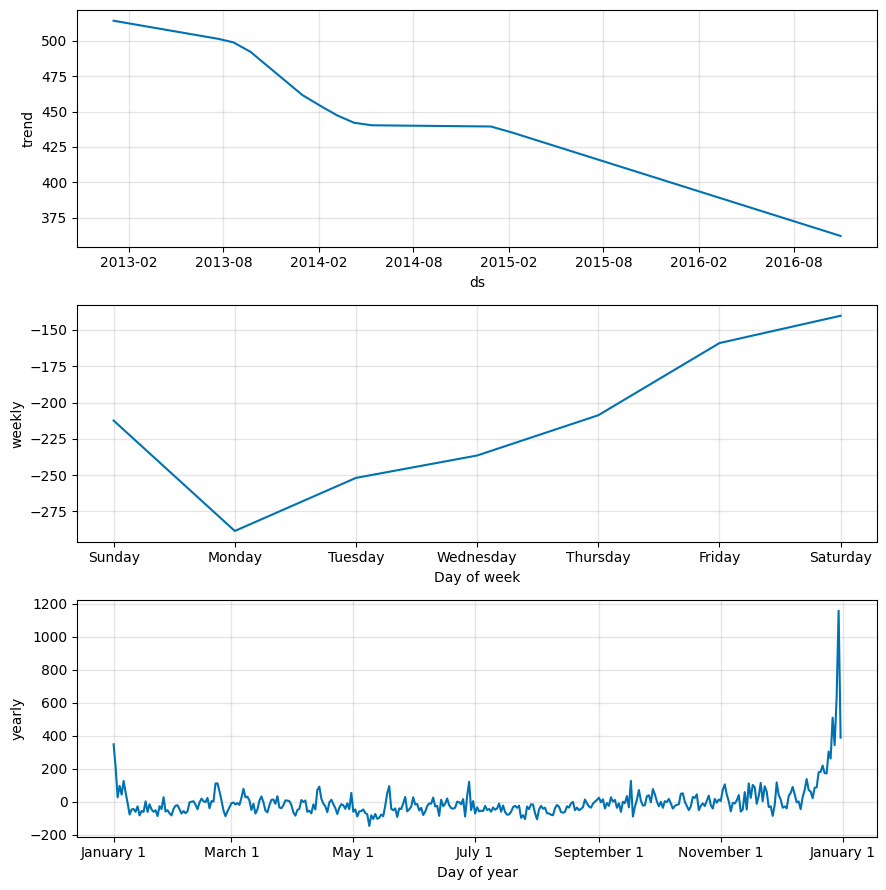

In [47]:
fig = model_tuning_seasonality.plot_components(forecast_tuning2, uncertainty=False)

#### Custom Seasonalities

1️⃣ Menghapus yearly seasonality

In [48]:
model_custom_seasonalities = Prophet(
    yearly_seasonality= False
)

2️⃣ Menambahkan Custom Seasonality

In [49]:
## add seasonality
model_custom_seasonalities.add_seasonality(name='monthly_custom', # nama pola musiman, sebagai identitas
                                         period=30.5, # berapa banyak baris dalam 1 pola musiman
                                         fourier_order=5) # mengatur fleksibilitas pola musiman

## fitting model
model_custom_seasonalities.fit(daily_total_qty)

17:52:39 - cmdstanpy - INFO - Chain [1] start processing
17:52:39 - cmdstanpy - INFO - Chain [1] done processing


3️⃣ Forecasting

In [50]:
future = model_custom_seasonalities.make_future_dataframe(periods= 365, freq= 'D')
forecast_custom_seasonalities = model_custom_seasonalities.predict(future)

4️⃣ Visualization

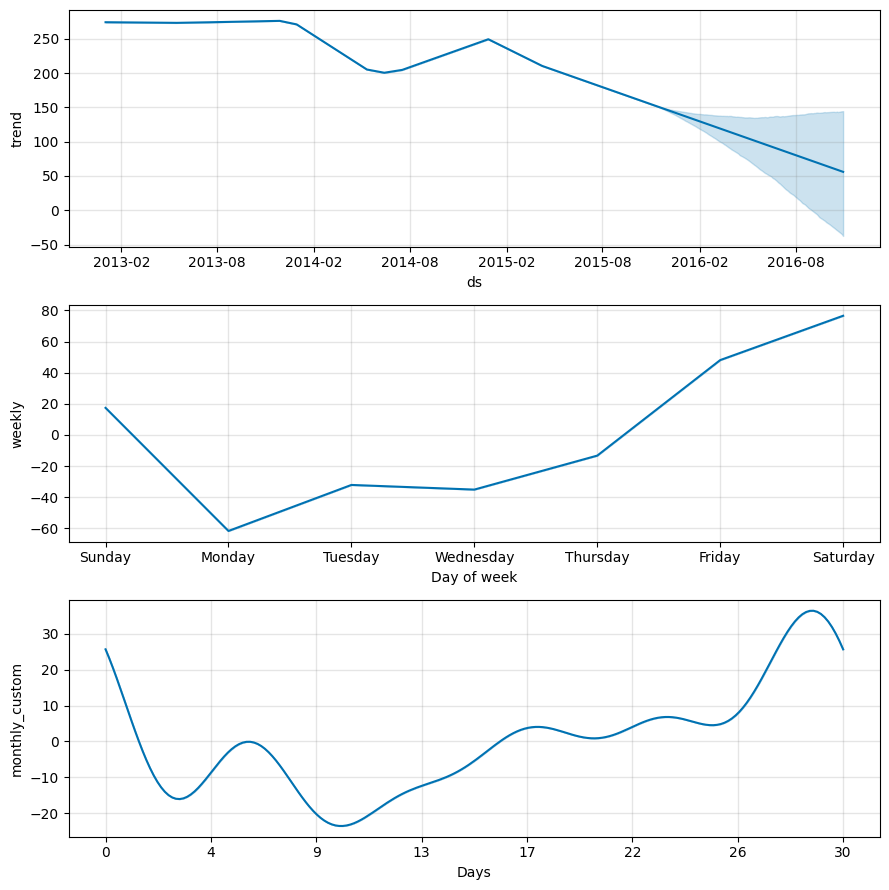

In [51]:
fig = model_custom_seasonalities.plot_components(forecast_custom_seasonalities)

### Holidays Effect

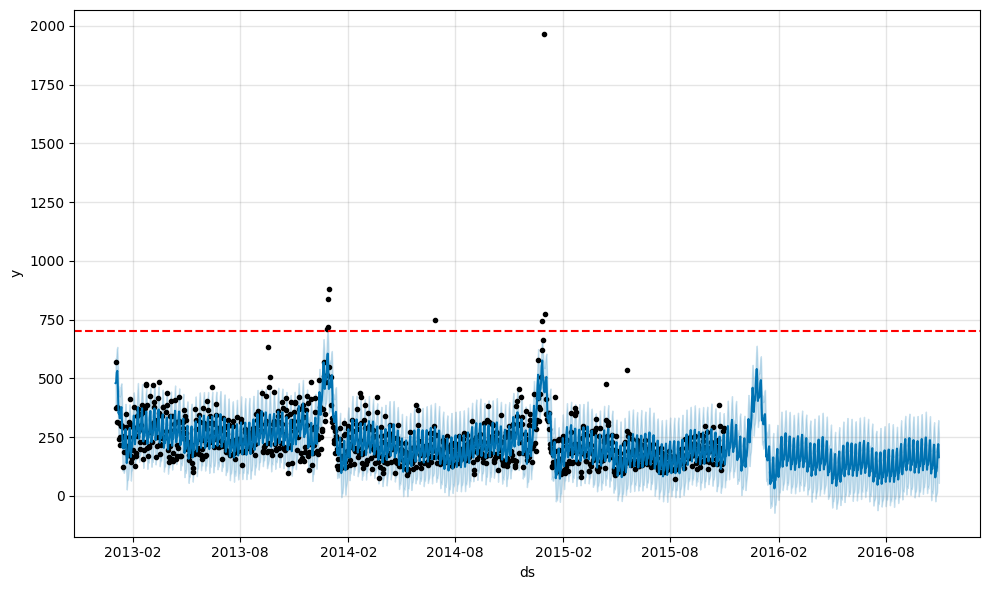

In [52]:
fig = model_25.plot(forecast_25)
plt.axhline(y=700, color='red', ls='--')
plt.show()

In [53]:
holiday = pd.DataFrame({
    'holiday': 'new_year_eve',
    'ds': pd.to_datetime(['2013-12-31', '2014-12-31', # past date, historical data 
                          '2015-12-31']), # future date, to be forecasted
    'lower_window': -4, # include 27th - 31st December
    'upper_window': 0})
holiday

holiday         ds  lower_window  upper_window
0  new_year_eve 2013-12-31            -4             0
1  new_year_eve 2014-12-31            -4             0
2  new_year_eve 2015-12-31            -4             0

17:52:41 - cmdstanpy - INFO - Chain [1] start processing
17:52:41 - cmdstanpy - INFO - Chain [1] done processing


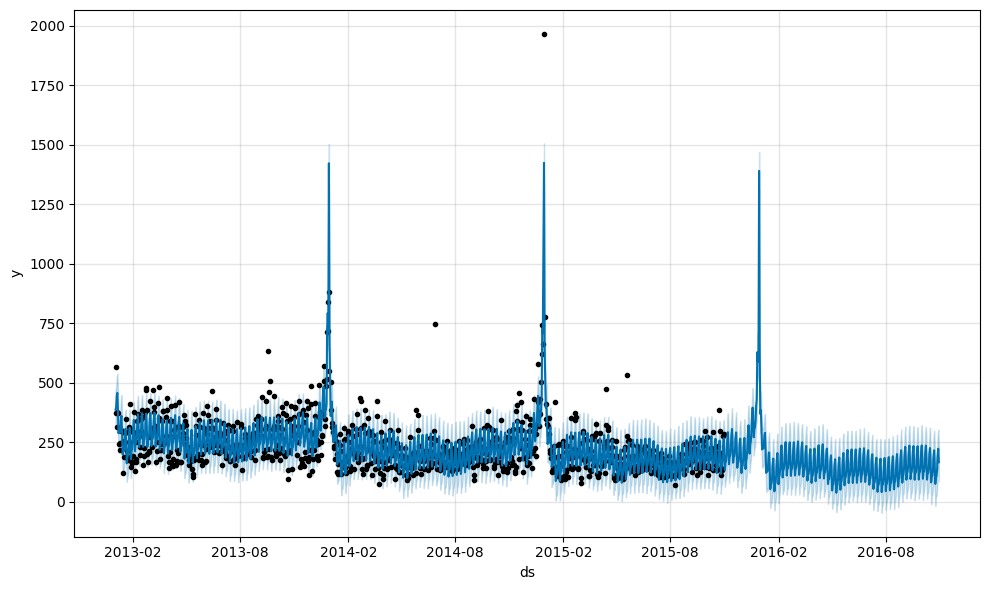

In [54]:
# fitting model
model_holiday = Prophet(holidays=holiday)
model_holiday.fit(daily_total_qty)

# forecasting
future = model_holiday.make_future_dataframe(periods=365, freq='D')
forecast_holiday = model_holiday.predict(future)

# visualize
fig = model_holiday.plot(forecast_holiday)

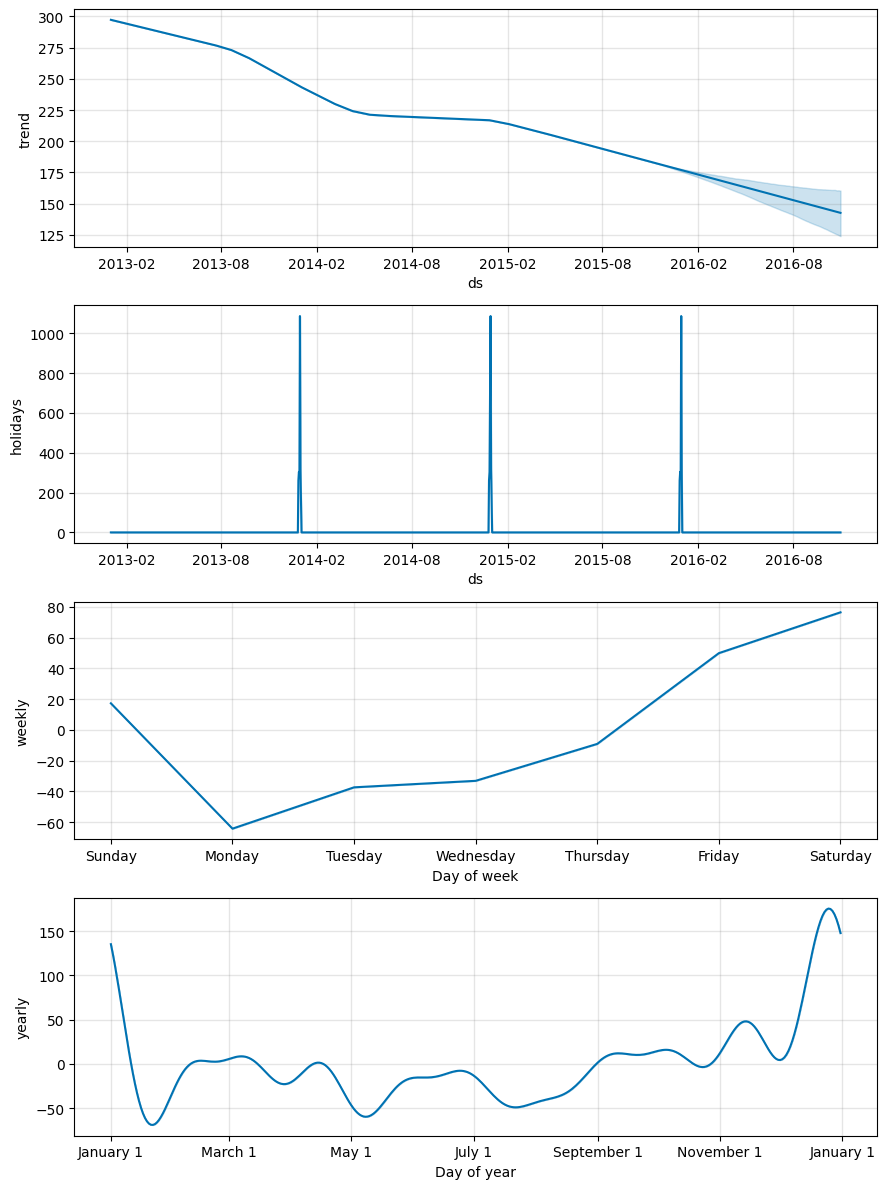

In [55]:
fig = model_holiday.plot_components(forecast_holiday)

<div class= alert>

`Interpretasi`

1. Efek Hari Libur Sangat Signifikan
    -   Penjualan meningkat tajam selama periode libur besar, menunjukkan bahwa promosi atau strategi yang berfokus pada hari libur memiliki potensi besar untuk mendorong pendapatan.

2. Penurunan Secara Trend Jangka Panjang
    -   Meskipun ada lonjakan selama hari libur, penurunan secara keseluruhan pada tren mengindikasikan perlunya strategi baru untuk memperbaiki kinerja di luar periode liburan.
    
3. Pola Mingguan dan Tahunan Stabil
    -   Pola musiman mingguan dan tahunan tetap konsisten, dengan penjualan lebih tinggi pada akhir pekan dan saat libur besar.

</div>

## 🎯 Model Evaluation

### Train-Test Split

In [56]:
cutoff = pd.to_datetime('2015-01-01')

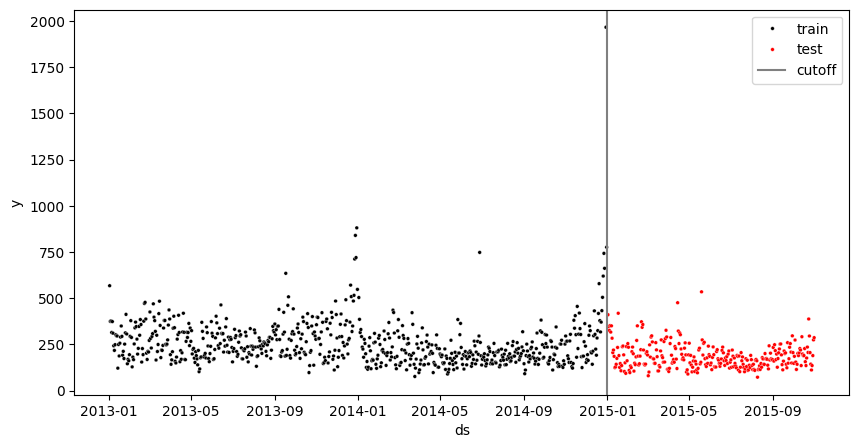

In [57]:
daily_total_qty['type'] = daily_total_qty['ds'].apply(
    lambda date: 'train' if date < cutoff else 'test')

plt.figure(figsize=(10, 5))
sns.scatterplot(x='ds', y='y', hue='type', s=7,
                palette=['black', 'red'],
                data=daily_total_qty)
plt.axvline(x=cutoff, color='gray', label='cutoff')
plt.legend()
plt.show()

In [58]:
train = daily_total_qty[ daily_total_qty['ds'] < cutoff ]
test = daily_total_qty[ daily_total_qty['ds'] >= cutoff ]

In [59]:
print(f'Train size: {train.shape}')
print(f'Test size: {test.shape}')

Train size: (727, 3)
Test size: (303, 3)


In [60]:
train.head()

ds      y   type
1  2013-01-02  568.0  train
4  2013-01-03  375.0  train
7  2013-01-04  377.0  train
10 2013-01-05  315.0  train
13 2013-01-06  374.0  train

1️⃣ Fitting Model

In [61]:
# inisiasi model: holiday + yearly_seasonality
model_final = Prophet(
    holidays=holiday,
    yearly_seasonality=True
)

# add_seasonality
model_final.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [62]:
model_final.fit(train)

17:52:45 - cmdstanpy - INFO - Chain [1] start processing
17:52:46 - cmdstanpy - INFO - Chain [1] done processing


2️⃣ Forecasting dari `model_final`

In [63]:
future_final = model_final.make_future_dataframe(periods= 365, freq= 'D')
forecast_final = model_final.predict(future_final)

3️⃣ Visualization dari data hasil forecasting `forecast_final`

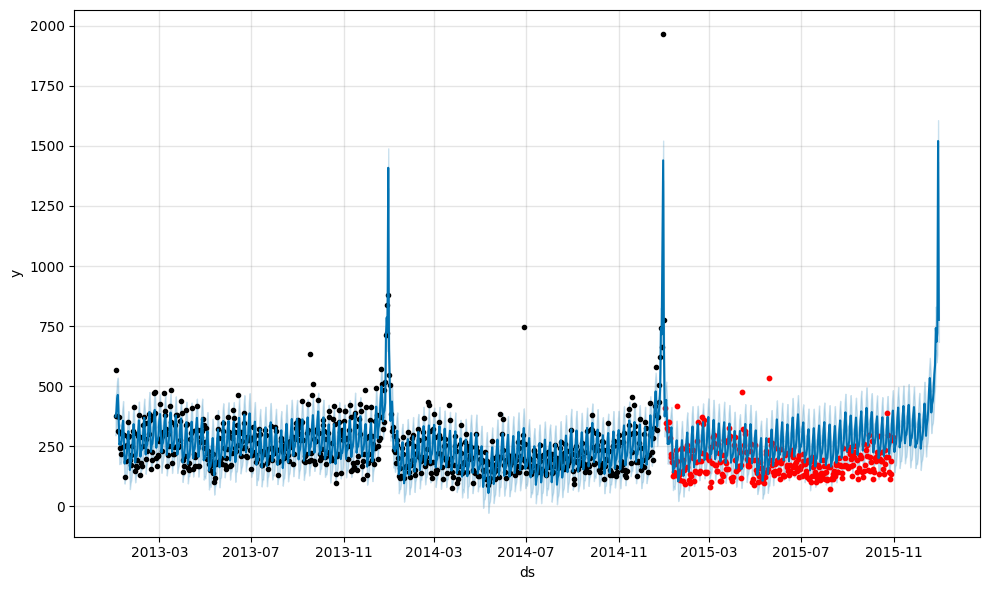

In [64]:
fig = model_final.plot(forecast_final)
plt.scatter(x=test['ds'], y=test['y'], s=10, color='red')
plt.show()

### Metrics Evaluation

In [65]:
from sklearn.metrics import mean_absolute_percentage_error

1️⃣ Data Train

In [66]:
forecast_train = forecast_final[forecast_final['ds'] < cutoff]

In [67]:
print(len(train['y']), len(forecast_train['yhat']))

727 727


In [68]:
train_mape = mean_absolute_percentage_error(y_true=train['y'],
                                            y_pred=forecast_train['yhat'])
train_mape

0.18229782103208228

2️⃣ Data Test

In [69]:
forecast_test = forecast_final[forecast_final['ds'] >= cutoff]

In [70]:
# Sinkronkan forecast_test agar hanya berisi tanggal yang ada di test
forecast_test = forecast_test[forecast_test['ds'].isin(test['ds'])]

# Sinkronkan test agar hanya berisi tanggal yang ada di forecast_test
test = test[test['ds'].isin(forecast_test['ds'])]

# Pastikan panjangnya sama setelah sinkronisasi
assert len(test) == len(forecast_test), "Test and forecast_test lengths do not match!"

In [71]:
test_mape = mean_absolute_percentage_error(y_true=test['y'], 
                                           y_pred=forecast_test['yhat'])
test_mape

0.5086932161430663

### Expanding Windows Cross Validation

In [72]:
from prophet.diagnostics import cross_validation

In [73]:
df_cv_f = cross_validation(model_final, # model yang sudah difitting
                         initial='600 days', # panjang seluruh data yang ada di model kita
                         horizon='30 days', # panjang waktu yang ditest
                         period='50 days') # lompatan tiap fold
df_cv_f

  0%|          | 0/2 [00:00<?, ?it/s]

17:52:47 - cmdstanpy - INFO - Chain [1] start processing
17:52:47 - cmdstanpy - INFO - Chain [1] done processing
17:52:48 - cmdstanpy - INFO - Chain [1] start processing
17:52:48 - cmdstanpy - INFO - Chain [1] done processing


ds        yhat  yhat_lower  yhat_upper       y     cutoff
0  2014-10-13  125.503813   49.528599  196.827459   112.0 2014-10-12
1  2014-10-14  146.270459   77.176140  214.258483   168.0 2014-10-12
2  2014-10-15  160.424148   87.863299  225.887558   198.0 2014-10-12
3  2014-10-16  194.793761  125.687709  261.185785   194.0 2014-10-12
4  2014-10-17  259.176591  185.281640  328.830284   235.0 2014-10-12
5  2014-10-18  293.790183  221.777441  362.828793   345.0 2014-10-12
6  2014-10-19  231.313200  162.209252  301.616452   230.0 2014-10-12
7  2014-10-20  136.179828   67.865114  204.747472   152.0 2014-10-12
8  2014-10-21  155.593135   83.885540  224.539474   131.0 2014-10-12
9  2014-10-22  169.287152   96.368197  236.460028   142.0 2014-10-12
10 2014-10-23  204.606129  131.977299  276.168106   132.0 2014-10-12
11 2014-10-24  271.498016  201.922801  348.050938   253.0 2014-10-12
12 2014-10-25  310.154216  243.653038  385.179868   252.0 2014-10-12
13 2014-10-26  252.769418  178.887734  322.191579   273.0 2014-10-12
14 2014-10-27  162.458015   95.036477  230.282863   133.0 2014-10-12
15 2014-10-28  184.423652  116.818837  252.409311   126.0 2014-10-12
16 2014-10-29  196.603338  125.818545  267.629438   162.0 2014-10-12
17 2014-10-30  225.829574  160.002584  298.740882   143.0 2014-10-12
18 2014-10-31  283.292798  219.600494  350.846019   252.0 2014-10-12
19 2014-11-01  311.654656  238.864323  382.073398   296.0 2014-10-12
20 2014-11-02  245.667130  176.283983  313.755790   266.0 2014-10-12
21 2014-11-03  150.115882   79.955066  218.650700   268.0 2014-10-12
22 2014-11-04  170.683705  100.082998  240.298181   189.0 2014-10-12
23 2014-11-05  184.827115  119.537585  254.183246   173.0 2014-10-12
24 2014-11-06  218.240631  150.586951  284.621094   153.0 2014-10-12
25 2014-11-07  280.454423  211.914263  355.659103   269.0 2014-10-12
26 2014-11-08  312.148729  241.490846  390.441388   305.0 2014-10-12
27 2014-11-09  246.390832  182.218560  319.081869   153.0 2014-10-12
28 2014-11-10  147.522367   77.644200  217.223449   130.0 2014-10-12
29 2014-11-11  162.630202   91.176323  233.534280   122.0 2014-10-12
30 2014-12-02  154.007046   87.178571  232.344120   169.0 2014-12-01
31 2014-12-03  157.824500   88.533880  225.837950   195.0 2014-12-01
32 2014-12-04  188.060628  118.125987  268.334352   164.0 2014-12-01
33 2014-12-05  254.287072  185.251045  326.704948   300.0 2014-12-01
34 2014-12-06  293.964374  218.218243  365.453661   350.0 2014-12-01
35 2014-12-07  235.824102  162.105461  308.095663   325.0 2014-12-01
36 2014-12-08  144.546392   74.361547  214.119133   209.0 2014-12-01
37 2014-12-09  163.880302   93.170476  237.575971   204.0 2014-12-01
38 2014-12-10  174.575038  104.318842  245.476490   143.0 2014-12-01
39 2014-12-11  210.999102  136.937930  280.514422   214.0 2014-12-01
40 2014-12-12  284.033728  216.839289  358.062615   297.0 2014-12-01
41 2014-12-13  332.438145  262.399114  406.295061   432.0 2014-12-01
42 2014-12-14  285.573134  219.741610  361.549909   305.0 2014-12-01
43 2014-12-15  207.488016  138.300062  275.409414   225.0 2014-12-01
44 2014-12-16  239.927077  169.879695  309.006761   192.0 2014-12-01
45 2014-12-17  260.893728  181.963050  325.202797   285.0 2014-12-01
46 2014-12-18  302.451366  232.044516  373.506764   325.0 2014-12-01
47 2014-12-19  374.696376  302.509742  445.941500   418.0 2014-12-01
48 2014-12-20  417.426867  346.836738  484.567363   579.0 2014-12-01
49 2014-12-21  362.211753  286.258703  430.650681   379.0 2014-12-01
50 2014-12-22  275.328039  207.109684  350.515680   318.0 2014-12-01
51 2014-12-23  299.867035  233.653165  374.252861   371.0 2014-12-01
52 2014-12-24  314.099393  251.372252  386.316883   433.0 2014-12-01
53 2014-12-25  349.641980  273.339349  417.542751   505.0 2014-12-01
54 2014-12-26  415.861918  345.638649  487.338008   620.0 2014-12-01
55 2014-12-27  683.422665  612.003628  751.846706   743.0 2014-12-01
56 2014-12-28  716.966036  646.587183  788.694671   662.0 2014-12-01
57 2014-1

In [74]:
df_cv = cross_validation(model_holiday, # model yang sudah difitting
                         initial='731 days', # panjang seluruh data yang ada di model kita
                         horizon='30 days', # panjang waktu yang ditest
                         period='90 days') # lompatan tiap fold
df_cv

  0%|          | 0/4 [00:00<?, ?it/s]

17:52:48 - cmdstanpy - INFO - Chain [1] start processing
17:52:48 - cmdstanpy - INFO - Chain [1] done processing
17:52:49 - cmdstanpy - INFO - Chain [1] start processing
17:52:49 - cmdstanpy - INFO - Chain [1] done processing
17:52:49 - cmdstanpy - INFO - Chain [1] start processing
17:52:49 - cmdstanpy - INFO - Chain [1] done processing
17:52:50 - cmdstanpy - INFO - Chain [1] start processing
17:52:50 - cmdstanpy - INFO - Chain [1] done processing


ds        yhat  yhat_lower  yhat_upper      y     cutoff
0   2015-01-05  246.995929  164.559141  326.266354  352.0 2015-01-04
1   2015-01-06  259.979348  177.768448  342.777335  317.0 2015-01-04
2   2015-01-07  251.878879  170.071320  339.958145  351.0 2015-01-04
3   2015-01-08  267.324342  188.072478  356.388207  284.0 2015-01-04
4   2015-01-09  317.739278  236.619364  395.464931  206.0 2015-01-04
..         ...         ...         ...         ...    ...        ...
115 2015-10-27  125.982502   53.886183  205.893356  112.0 2015-10-01
116 2015-10-28  131.871187   54.027353  214.783172  136.0 2015-10-01
117 2015-10-29  159.016123   72.694384  238.897431  190.0 2015-10-01
118 2015-10-30  221.156684  133.382000  300.180332  275.0 2015-10-01
119 2015-10-31  251.580526  171.093304  332.704489  287.0 2015-10-01

[120 rows x 6 columns]

In [75]:
from helper import viz

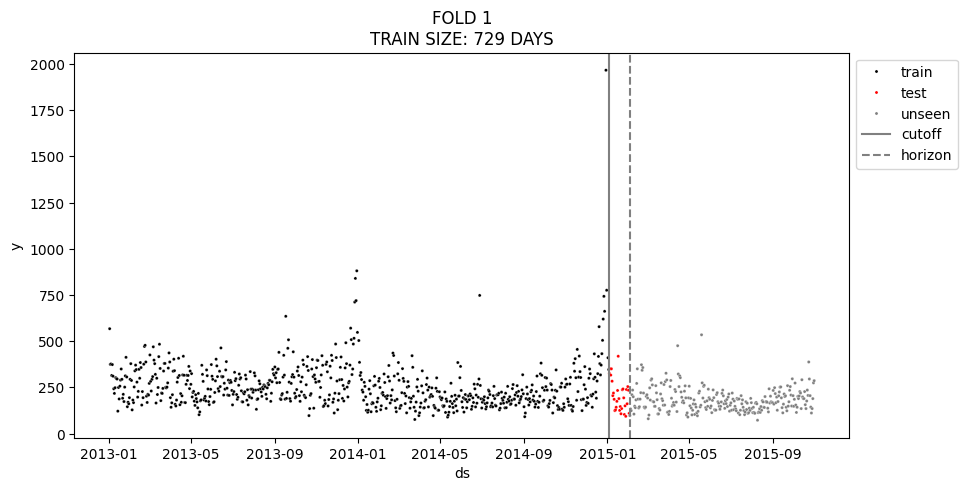

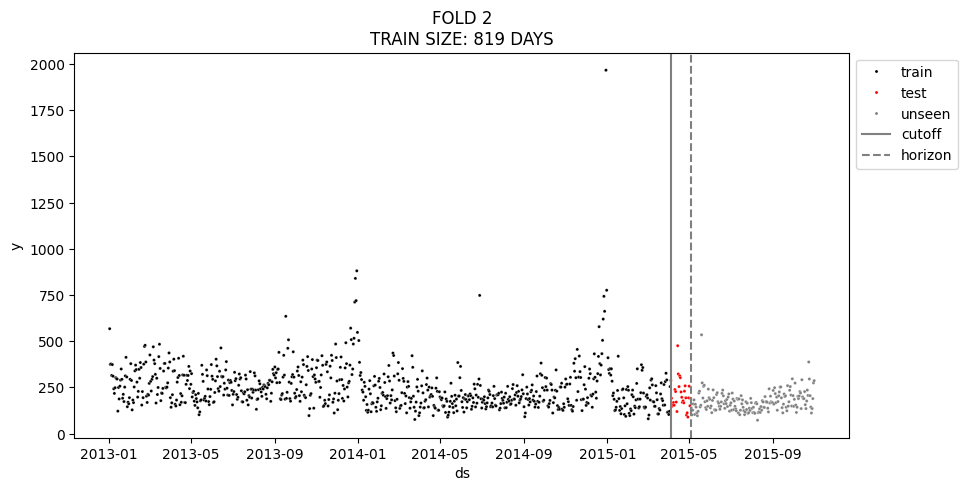

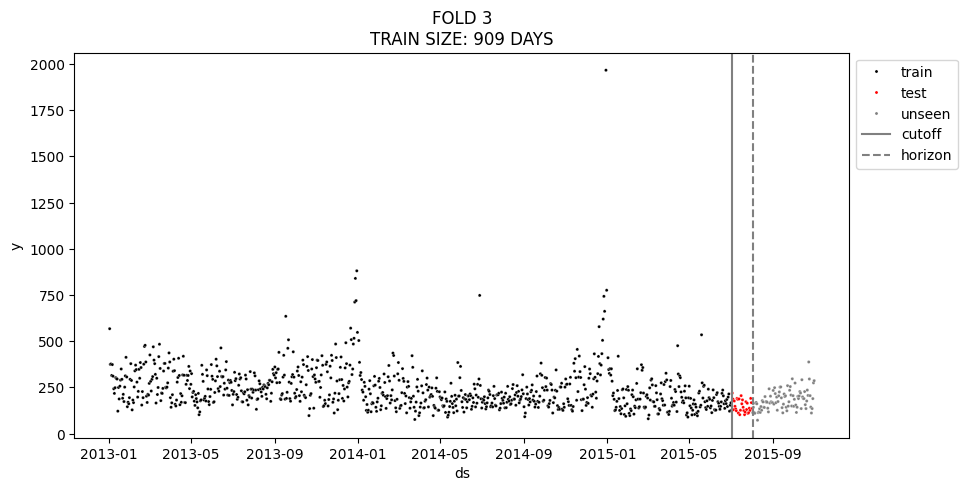

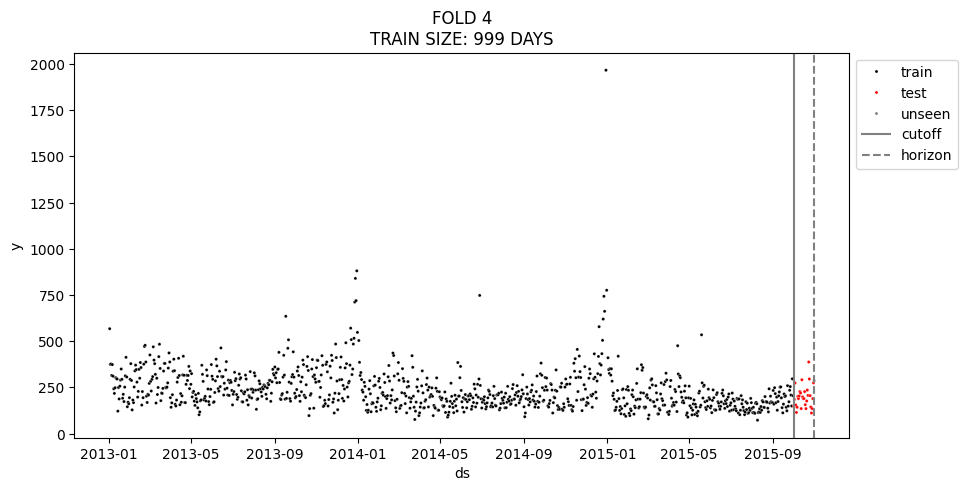

In [76]:
# for illustration purposes only
df_copy = daily_total_qty[['ds', 'y']].copy()
df_cutoff_horizon = df_cv.groupby('cutoff')[['ds']].max()

viz.forward_chaining_viz(df_copy, df_cutoff_horizon)

In [77]:
cv_mape = df_cv.groupby('cutoff').apply(
    lambda x: mean_absolute_percentage_error(y_true=x['y'],
                                     y_pred=x['yhat']))
cv_mape

C:\Users\ACER\AppData\Local\Temp\ipykernel_12608\701865348.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



cutoff
2015-01-04    0.237893
2015-04-04    0.202257
2015-07-03    0.332877
2015-10-01    0.203354
dtype: float64

In [78]:
cv_mape.mean()

0.24409522504005723

### Hyperparameter Tuning 

1️⃣ Menentukan Hyperparameter dan masukkan beberapa nilai didalamnya. Serta buat variabel untuk mengisi kombinasi Hyperparameter dan nilai MAPE

In [79]:
from sklearn.model_selection import ParameterGrid

# Grid search parameters (TO DO: specify possible values)
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.05, 0.1],
    'yearly_seasonality': [10, 20, 30]
}

# Generate all combinations of parameters
all_params = list(ParameterGrid(param_grid))

mape = []  # Store the result for each params here

In [80]:
all_params

[{'changepoint_prior_scale': 0.001, 'yearly_seasonality': 10},
 {'changepoint_prior_scale': 0.001, 'yearly_seasonality': 20},
 {'changepoint_prior_scale': 0.001, 'yearly_seasonality': 30},
 {'changepoint_prior_scale': 0.01, 'yearly_seasonality': 10},
 {'changepoint_prior_scale': 0.01, 'yearly_seasonality': 20},
 {'changepoint_prior_scale': 0.01, 'yearly_seasonality': 30},
 {'changepoint_prior_scale': 0.05, 'yearly_seasonality': 10},
 {'changepoint_prior_scale': 0.05, 'yearly_seasonality': 20},
 {'changepoint_prior_scale': 0.05, 'yearly_seasonality': 30},
 {'changepoint_prior_scale': 0.1, 'yearly_seasonality': 10},
 {'changepoint_prior_scale': 0.1, 'yearly_seasonality': 20},
 {'changepoint_prior_scale': 0.1, 'yearly_seasonality': 30}]

2️⃣ Melakukan iterasi dengan memasukkan kedalam pembuatan model Prophet - Fitting Model - Evaluasi

In [81]:
# Iterate each parameter
for parameter in all_params:
    # print parameter
    print(parameter)
    # (TO DO: change the data and add other components: seasonality, holiday)
    model = Prophet(changepoint_prior_scale = parameter['changepoint_prior_scale'],
                    yearly_seasonality= parameter['yearly_seasonality'],
                    holidays=holiday)
    # Train model with data train
    model.fit(train)
    
    # forecasting
    future = model.make_future_dataframe(periods=303, freq='D') # 303 days (test size)
    forecast = model.predict(future)
    
    # Evaluation metrics: MAPE
    forecast_test = forecast[forecast['ds'] >= cutoff]
    test_mape = mean_absolute_percentage_error(y_true=test['y'],
                                               y_pred=forecast_test['yhat'])
    
    mape.append(round(test_mape, 2))

17:52:52 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.001, 'yearly_seasonality': 10}


17:52:52 - cmdstanpy - INFO - Chain [1] done processing
17:52:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:52:53 - cmdstanpy - INFO - Chain [1] start processing
17:52:56 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.001, 'yearly_seasonality': 20}


17:52:56 - cmdstanpy - INFO - Chain [1] start processing
17:52:56 - cmdstanpy - INFO - Chain [1] done processing
17:52:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:52:56 - cmdstanpy - INFO - Chain [1] start processing
17:52:59 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.001, 'yearly_seasonality': 30}


17:53:00 - cmdstanpy - INFO - Chain [1] start processing
17:53:00 - cmdstanpy - INFO - Chain [1] done processing
17:53:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:53:00 - cmdstanpy - INFO - Chain [1] start processing
17:53:03 - cmdstanpy - INFO - Chain [1] done processing
17:53:04 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.01, 'yearly_seasonality': 10}


17:53:04 - cmdstanpy - INFO - Chain [1] done processing
17:53:04 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.01, 'yearly_seasonality': 20}


17:53:04 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.01, 'yearly_seasonality': 30}


17:53:05 - cmdstanpy - INFO - Chain [1] start processing
17:53:05 - cmdstanpy - INFO - Chain [1] done processing
17:53:05 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.05, 'yearly_seasonality': 10}


17:53:05 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.05, 'yearly_seasonality': 20}


17:53:06 - cmdstanpy - INFO - Chain [1] start processing
17:53:06 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.05, 'yearly_seasonality': 30}


17:53:06 - cmdstanpy - INFO - Chain [1] start processing
17:53:07 - cmdstanpy - INFO - Chain [1] done processing
17:53:07 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'yearly_seasonality': 10}


17:53:07 - cmdstanpy - INFO - Chain [1] done processing
17:53:07 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'yearly_seasonality': 20}


17:53:08 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'yearly_seasonality': 30}


17:53:08 - cmdstanpy - INFO - Chain [1] start processing
17:53:08 - cmdstanpy - INFO - Chain [1] done processing


3️⃣ Menampilkan kombinasi Hyperparameter yang baik

In [82]:
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mape

tuning_results.sort_values(by='mape')

changepoint_prior_scale  yearly_seasonality  mape
3                     0.010                  10  0.34
4                     0.010                  20  0.34
5                     0.010                  30  0.34
0                     0.001                  10  0.35
1                     0.001                  20  0.35
2                     0.001                  30  0.36
8                     0.050                  30  0.53
7                     0.050                  20  0.54
6                     0.050                  10  0.58
10                    0.100                  20  0.62
11                    0.100                  30  0.63
9                     0.100                  10  0.69

<div class= alert>

`Interpretasi`
-   Parameter Optimal
    -   Gunakan changepoint_prior_scale = 0.010 dan salah satu nilai yearly_seasonality = 10, 20, atau 30, tergantung pada kebutuhan interpretasi musiman.
    -   Untuk kompleksitas lebih rendah, yearly_seasonality = 10 cukup memadai.

-   Parameter yang Kurang Baik
    -   Hindari menggunakan changepoint_prior_scale = 0.100, karena menghasilkan MAPE tinggi (0.69), menunjukkan overfitting.

-   Analisis Lanjutan
    -   Jika diperlukan, lakukan evaluasi tambahan menggunakan metrik lain (seperti RMSE atau MAE) untuk memastikan parameter optimal.

</div>

4️⃣ Rebuilding Model

In [83]:
import numpy as np

best_params = all_params[np.argmin(mape)]
best_params

{'changepoint_prior_scale': 0.01, 'yearly_seasonality': 10}

In [84]:
model_best = Prophet(
    **best_params, holidays=holiday
)

model_best.fit(train)

17:53:09 - cmdstanpy - INFO - Chain [1] start processing
17:53:09 - cmdstanpy - INFO - Chain [1] done processing


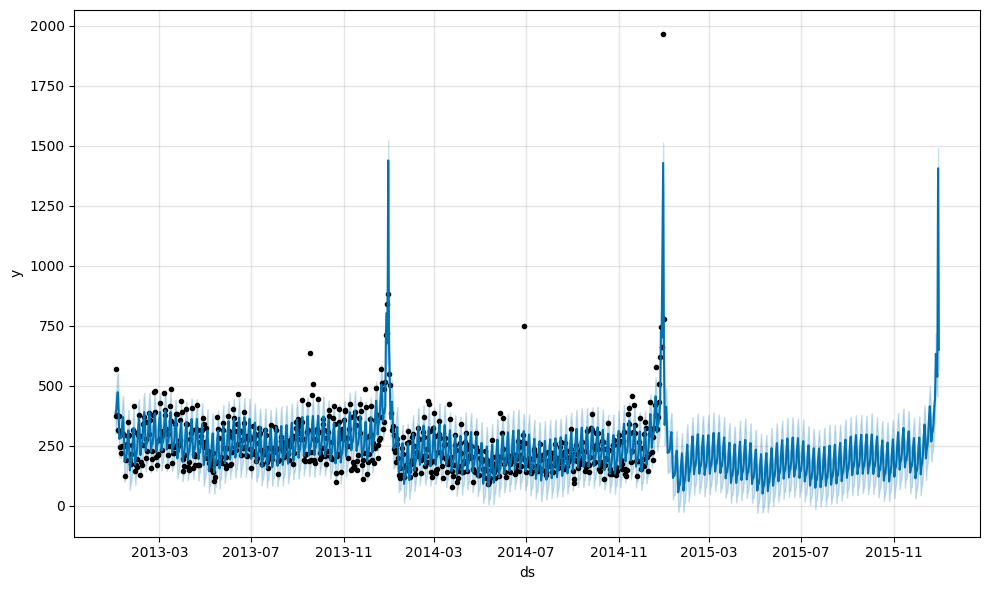

In [85]:
future_best = model_best.make_future_dataframe(periods=365, freq='D')
forecast_best = model_best.predict(future_best)

fig = model_best.plot(forecast_best)

## 📖 References

-   https://www.kaggle.com/c/competitive-data-science-predict-future-sales/overview
-   https://gist.github.com/rxaviers/7360908
-   https://academic.oup.com/jrsssb/article/86/2/273/7517020
-   https://medium.com/ppl-d7-fasilkom-ui/mengenal-time-series-forecasting-647929e16b3f
